<a href="https://colab.research.google.com/github/alejandroaviles/WL_MACSS-2023/blob/main/Project3_xipm_from_simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 3:** Compute the correlation functions $\xi_{\pm}$ from simulations
  

Import modules. These are avaiilabe in Google Colab. If you are running this from your lap, you have to install them. e.g. conda install astropy, pip install os-sys  

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os

clone course Github repository

In [2]:
!git clone https://github.com/alejandroaviles/WL_MACSS-2023.git

fatal: destination path 'WL_MACSS-2023' already exists and is not an empty directory.


In [5]:
os.chdir('WL_MACSS-2023')  # move to repositiry folder

Install treecorr

In [6]:
!pip install treecorr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 92.0 MB/s eta 0:00:00


In [7]:
import treecorr

## We use the Weak Lensing simulations from [astro-ph/0312133](https://arxiv.org/abs/astro-ph/0312133) available [here](http://mwhite.berkeley.edu/Lensing/ValeWhite/). 

Just checking files are already in the directory

In [20]:
# get the current working directory
current_working_directory = os.getcwd()
# print output to the console
print(current_working_directory)
file_exists = os.path.exists('gamma_A.0.fits')
print(file_exists)

/content/WL_MACSS-2023
True


In [22]:
catalogue='A'
number='0'

filename='gamma_'+catalogue+'.'+number+'.fits'
gammaA0 = fits.getdata(filename, ext=0)

print('file:',filename)
print('file shape is',gammaA0.shape)
length=gammaA0.shape[1]

file: gamma_A.0.fits
file shape is (1024, 1024, 2)


Extract numpy arrays for $\gamma_1$ and $\gamma_2$, and for the positions (located on a 2-dim euclidian regular grid)

In [27]:
A0gamma1 = np.zeros(length*length);
A0gamma2 = np.zeros(length*length);
yT = np.zeros(length*length);
xT = np.zeros(length*length);

size_in_degrees=2;  
tounits=size_in_degrees/length * np.pi/180; # 1 degree = pi/180

print('lenght in degrees:',size_in_degrees)
print('conversion to units (rad):',tounits)


nn=0;
for jj in range(length):
    for ii in range(length):
        A0gamma1[nn] = gammaA0[jj,ii,0]
        A0gamma2[nn] = gammaA0[jj,ii,1]
        xT[nn] = ii*tounits
        yT[nn] = jj*tounits
        nn=nn+1

print('number of input data:',len(xT))


lenght in degrees: 2
conversion to units (rad): 3.408846195301425e-05
number of input data: 1048576


## Run Treecorr

Codes units are radians, but usually people prefer arcmin for presentation purposes. 1 arcmin = $\pi \,/ (180 \times 60)$ rad $\sim 0.00029$ rad

In [11]:
minArcmin=1.
maxArcmin=60.
minRad=minArcmin*np.pi/60/180
maxRad=maxArcmin*np.pi/60/180
print("minRad={:.5}, maxRad={:.5}".format(minRad,maxRad))
nbins=10

minRad=0.00029089, maxRad=0.017453


Pass the catalogue to treecorr

In [24]:
#cat=treecorr.Catalog(ra=xT,dec=yT,g1=A0gamma1,g2=A0gamma2,ra_units="rad",dec_units="rad")
catalogue=treecorr.Catalog(x=xT,y=yT,g1=A0gamma1,g2=A0gamma2,x_units="rad",y_units="rad")

Run treecorr

In [25]:
GG=treecorr.GGCorrelation(min_sep=minRad,max_sep=maxRad,verbose=2,nbins=nbins)
GG.process(catalogue)

nbins = 10, min,max sep = 0.000290888..0.0174533, bin_size = 0.409434


INFO:treecorr:nbins = 10, min,max sep = 0.000290888..0.0174533, bin_size = 0.409434


Starting process GG auto-correlations


INFO:treecorr:Starting process GG auto-correlations


Using 2 threads.


INFO:treecorr:Using 2 threads.


Building GField


INFO:treecorr:Building GField


Starting 256 jobs.


INFO:treecorr:Starting 256 jobs.


varg = 0.000354: sig_sn (per component) = 0.018827


INFO:treecorr:varg = 0.000354: sig_sn (per component) = 0.018827


Check what we obtain from treecorr:

In [15]:
GG.__dict__

{'_corr': <cdata 'void *' 0x13c9850>,
 'config': {'min_sep': 0.0002908882086657216,
  'max_sep': 0.017453292519943292,
  'verbose': 2,
  'nbins': 10,
  'brute': False,
  'split_method': 'mean',
  'max_top': 10,
  'precision': 4,
  'pairwise': False,
  'm2_uform': 'Crittenden',
  'metric': 'Euclidean',
  'bin_type': 'Log',
  'var_method': 'shot',
  'num_bootstrap': 500},
 'logger': <Logger treecorr (INFO)>,
 '_ro': <treecorr.binnedcorr2.Namespace at 0x7f6e875ddff0>,
 'coords': 'flat',
 'metric': 'Euclidean',
 'results': {},
 'npatch1': 1,
 'npatch2': 1,
 '_rng': None,
 'xip': array([3.02832135e-04, 2.24363092e-04, 1.56827231e-04, 1.06644524e-04,
        7.00641450e-05, 4.31243126e-05, 2.96064006e-05, 1.59524177e-05,
        6.85589140e-06, 1.31451575e-07]),
 'xim': array([-9.73387791e-07, -2.11330720e-06, -3.40266898e-07, -3.83613009e-06,
        -1.38292718e-06, -2.15426757e-06,  7.64716549e-07,  2.45727187e-07,
        -3.90291179e-06, -4.25214102e-06]),
 'xip_im': array([ 1.02873310e

Unnecessary:

In [16]:
salida = np.zeros((len(GG.xip),4))  
#print(salida)              # Prints 

for ii in range(len(GG.xip)):
    salida[ii,0] = GG.meanr[ii]/np.pi*180*60
    salida[ii,1] = GG.xip[ii]
    salida[ii,2] = GG.xim[ii]
    salida[ii,3] = GG.npairs[ii]

## **PLOT**

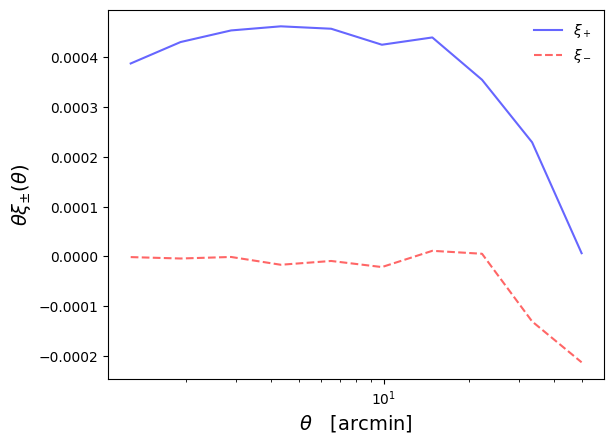

In [28]:
thtArr=np.array(GG.meanr)/np.pi*180*60
#plt.figure(figsize=(10,8))
fig = plt.figure();
ax1 = fig.add_subplot(1, 1, 1)
#ax1.axis('equal')
#ax1.set_xscale('log')
ax1.set_xscale('log')
ax1.plot(thtArr,thtArr*GG.xip,linestyle="-",c="b",alpha=.6,label="$\\xi_+$")
ax1.plot(thtArr,thtArr*GG.xim,linestyle="--",c="r",alpha=.6,label="$\\xi_-$")
ax1.legend(frameon=False)
ax1.set_ylabel(r"$ \theta \xi_{\pm}(\theta) $", fontsize=14)
ax1.set_xlabel(r"$\theta  \quad $[arcmin]", fontsize=14)
#plt.title(prefix+"   points="+str(nSample))

plt.show()


# Download all realizations of the **sims** from drive.

## Either, you can download them from [mwhite.berkeley.edu/Lensing/ValeWhite/](http://mwhite.berkeley.edu/Lensing/ValeWhite/)

In [29]:
!gdown 1Tv7Q9lKa6ymUeWREcomDAO45EijLoM9P

Downloading...
From: https://drive.google.com/uc?id=1Tv7Q9lKa6ymUeWREcomDAO45EijLoM9P
To: /content/WL_MACSS-2023/MWhite_WL_sims.zip
100% 232M/232M [00:01<00:00, 128MB/s]


In [30]:
!unzip MWhite_WL_sims.zip

Archive:  MWhite_WL_sims.zip
replace sims/gamma_B.4.fits? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace sims/gamma_B.4.fits? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sims/gamma_B.4.fits     
replace sims/kappa_B.1.fits? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sims/kappa_B.1.fits     
replace sims/gamma_A.4.fits? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sims/gamma_A.4.fits     
replace sims/kappa_A.8.fits? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sims/kappa_A.8.fits     
replace sims/gamma_A.3.fits? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sims/gamma_A.3.fits     
replace sims/gamma_A.7.fits? [y]es, [n]o, [A]ll, [N]one, [r]ename: yy
  inflating: sims/gamma_A.7.fits     
replace sims/kappa_A.5.fits? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sims/kappa_A.5.fits     
replace sims/kappa_B.2.fits? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sims/kappa_B.2.fits     
replace sim

# **Exercise**

### Do the same for the rest of the realizations: 

1. Choose either simulations A or simulations B: *gamma_{A,B}.{0-9}.fits*. 
2. Take the average of the 10 realizations and the standard deviations. 
3. Plot the average with error bars
4. *Bonus:* Do the same for the simulations of the convergence *kappa_{A,B}.{0-9}.fits*